In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
import warnings 
from lightgbm import LGBMClassifier
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('ModifiedTrain.csv')
test = pd.read_csv('ModifiedTest.csv')

In [4]:
train.head()

,Unnamed: 0,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_02_to_mean_card1,id_02_to_mean_card4,id_02_to_std_card1,id_02_to_std_card4,D15_to_mean_card1,D15_to_mean_card4,D15_to_std_card1,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1
0,0,0,86400,68.5,4,13926,362.55467,150.0,1,142.0,...,0.422530,0.413902,0.673947,0.461592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,86401,29.0,4,2755,404.00000,150.0,2,102.0,...,0.573879,0.570437,0.591021,0.622173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0,86469,59.0,4,4663,490.00000,150.0,3,166.0,...,1.057784,1.095840,1.186661,1.200134,2.518583,1.865833,1.851016,1.541441,1.611525,1.486472
3,3,0,86499,50.0,4,18132,567.00000,150.0,2,117.0,...,1.304678,1.278904,1.360737,1.394895,0.550272,0.720027,0.520531,0.558391,0.686169,0.576638
4,4,0,86506,50.0,1,4497,514.00000,150.0,2,102.0,...,0.094114,0.043008,0.073463,0.046909,1.000000,1.000000,1.052259,0.808191,1.000000,0.885451


In [ ]:
#From the part2 we conclude that we will remove all the id feaures of identity data
train.drop(['P_emaildomain','R_emaildomain','id_01','id_02','id_03','id_04','id_05','id_06'
           ,'id_07','id_08','id_09','id_10','id_11','id_12','id_13','id_14','id_15','id_16'
           ,'id_17','id_18','id_19','id_20','id_21','id_22','id_23','id_24','id_25','id_26'
           ,'id_27','id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_36','id_37',
           'id_38','DeviceInfo','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
test.drop(['P_emaildomain','R_emaildomain','id_01','id_02','id_03','id_04','id_05','id_06'
           ,'id_07','id_08','id_09','id_10','id_11','id_12','id_13','id_14','id_15','id_16'
           ,'id_17','id_18','id_19','id_20','id_21','id_22','id_23','id_24','id_25','id_26'
           ,'id_27','id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_36','id_37',
           'id_38','DeviceInfo','Unnamed: 0'],axis=1,inplace=True)

In [20]:
test.shape[1]

136

In [18]:
for i in test.columns:
    print(i,'NaN values present is:',test[i].isnull().sum(),end=" ")
    print('type is :',test[i].dtypes,end=" ")
    print('% of NaN values:',np.round(test[i].isnull().sum()/test.shape[0]*100,2))

Unnamed: 0 NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : int64 % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card3 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card4 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card5 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card6 NaN values present is: 0 type is : int64 % of NaN values: 0.0
addr1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
addr2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
C1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
C2 NaN values p

uid_V127_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V136_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V309_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V307_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V320_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
outsider15 NaN values present is: 0 type is : int8 % of NaN values: 0.0


In [17]:
for i in train.columns:
    print(i,'NaN values present is:',train[i].isnull().sum(),end=" ")
    print('type is :',train[i].dtypes,end=" ")
    print('% of NaN values:',np.round(train[i].isnull().sum()/train.shape[0]*100,2))

Unnamed: 0 NaN values present is: 0 type is : int64 % of NaN values: 0.0
isFraud NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : int64 % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card3 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card4 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card5 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card6 NaN values present is: 0 type is : int64 % of NaN values: 0.0
addr1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
addr2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
C1 NaN value

uid_V314_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V127_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V136_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V309_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V307_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
uid_V320_ct NaN values present is: 0 type is : float32 % of NaN values: 0.0
outsider15 NaN values present is: 0 type is : int8 % of NaN values: 0.0


In [8]:
#we will first impute all the categorical value with mode and all the numerical value with mean.

In [5]:
for i in train.columns:
    if train[i].dtypes=='int64' or train[i].dtypes=='float64':
        train[i].fillna(train[i].mean(),inplace=True)

In [6]:
for i in test.columns:
    if test[i].dtypes=='int64' or test[i].dtypes=='float64':
        test[i].fillna(test[i].mean(),inplace=True)

In [7]:
for i in train.columns:
    if train[i].dtypes=='object':
        train[i].fillna(train[i].mode()[0],inplace=True)

In [8]:
for i in test.columns:
    if test[i].dtypes=='object':
        test[i].fillna(test[i].mode()[0],inplace=True)

In [45]:
for i in train.columns:
    print(i,'NaN values present is:',train[i].isnull().sum(),end=" ")
    print('type is :',train[i].dtypes,end=" ")
    print('% of NaN values:',np.round(train[i].isnull().sum()/train.shape[0]*100,2))

TransactionID NaN values present is: 0 type is : int64 % of NaN values: 0.0
isFraud NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionDT NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : int64 % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card3 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card4 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card5 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card6 NaN values present is: 0 type is : int64 % of NaN values: 0.0
addr1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
addr2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dis

V73 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V74 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V75 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V76 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V77 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V78 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V79 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V80 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V81 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V82 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V83 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V84 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V85 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V86 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V87 NaN values present is: 0 type is : float64 %

V197 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V198 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V199 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V200 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V201 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V202 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V203 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V204 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V205 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V206 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V207 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V208 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V209 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V210 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V211 NaN values present is: 0 type

V316 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V317 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V318 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V319 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V320 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V321 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V322 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V323 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V324 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V325 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V326 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V327 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V328 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V329 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V330 NaN values present is: 0 type

In [16]:
#label encoding the categorical value
#card4,card6,M1 to M9,DeviceType,alertFeature,card3Values,P_emaildomain_bin,P_emaildomain_suffix
#R_emaildomain_bin,R_emaildomain_suffix,DeviceCorp,browser_id_31,version_id_31,OS_id_30

In [10]:
for i in ['card4','card6','M1','M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','alertFeature','card3Values','P_emaildomain_bin',
          'P_emaildomain_suffix','R_emaildomain_bin','R_emaildomain_suffix','DeviceCorp','browser_id_31','version_id_31','OS_id_30',
           'version_id_30','ProductCD']:
    le =LabelEncoder()
    le.fit(list(train[i].astype(str).values) + list(test[i].astype(str).values))
    train[i] = le.transform(list(train[i].astype(str).values))
    test[i] = le.transform(list(test[i].astype(str).values))

In [15]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_02_to_mean_card1,id_02_to_mean_card4,id_02_to_std_card1,id_02_to_std_card4,D15_to_mean_card1,D15_to_mean_card4,D15_to_std_card1,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1
0,0,86400,68.5,4,13926,362.55467,150.0,1,142.0,0,...,0.422530,0.413902,0.673947,0.461592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,86401,29.0,4,2755,404.00000,150.0,2,102.0,0,...,0.573879,0.570437,0.591021,0.622173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,86469,59.0,4,4663,490.00000,150.0,3,166.0,1,...,1.057784,1.095840,1.186661,1.200134,2.518583,1.865833,1.851016,1.541441,1.611525,1.486472
3,0,86499,50.0,4,18132,567.00000,150.0,2,117.0,1,...,1.304678,1.278904,1.360737,1.394895,0.550272,0.720027,0.520531,0.558391,0.686169,0.576638
4,0,86506,50.0,1,4497,514.00000,150.0,2,102.0,0,...,0.094114,0.043008,0.073463,0.046909,1.000000,1.000000,inf,0.808191,1.000000,inf


In [16]:
#we can see some of the inf values are occuring in the dataframe
#lets convert this inf value to NaN then impute using the mean
train.replace([np.inf, -np.inf], np.nan,inplace=True)
test.replace([np.inf, -np.inf], np.nan,inplace=True)

In [18]:
for i in train.columns:
    print(i,'NaN values present is:',train[i].isnull().sum(),end=" ")
    print('type is :',train[i].dtypes,end=" ")
    print('% of NaN values:',np.round(train[i].isnull().sum()/train.shape[0]*100,2))

isFraud NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionDT NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : int64 % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card3 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card4 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card5 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card6 NaN values present is: 0 type is : int64 % of NaN values: 0.0
addr1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
addr2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
C1 NaN va

V70 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V71 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V72 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V73 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V74 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V75 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V76 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V77 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V78 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V79 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V80 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V81 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V82 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V83 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V84 NaN values present is: 0 type is : float64 %

V190 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V191 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V192 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V193 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V194 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V195 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V196 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V197 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V198 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V199 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V200 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V201 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V202 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V203 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V204 NaN values present is: 0 type

V313 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V314 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V315 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V316 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V317 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V318 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V319 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V320 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V321 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V322 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V323 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V324 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V325 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V326 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V327 NaN values present is: 0 type

In [19]:
#TransactionAmt_to_std_card1,D15_to_std_card1,D15_to_std_addr1 contains null values 
#now lets replace them with the mean

In [20]:
for i in ['TransactionAmt_to_std_card1','D15_to_std_card1','D15_to_std_addr1']:
    train[i].fillna(train[i].mean(),inplace=True)
    test[i].fillna(test[i].mean(),inplace=True)

<h3> Visualization in 2D space using PCA </h3>

In [37]:
#train data contains also the y values lets seprate that and apply PCA on top of it
#Also removing the transactionAmt and transactionDT because we have created features from that
train_pca = train.drop(['isFraud','TransactionAmt','TransactionDT'],axis=1)

In [38]:
#first standardize the data
sc = StandardScaler()
train_pca = sc.fit_transform(train_pca)

In [39]:
#Applyig PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_pca)

In [40]:
#converting the numpy array to dataframe
train_pca = pd.DataFrame(train_pca,columns=['col1','col2'])

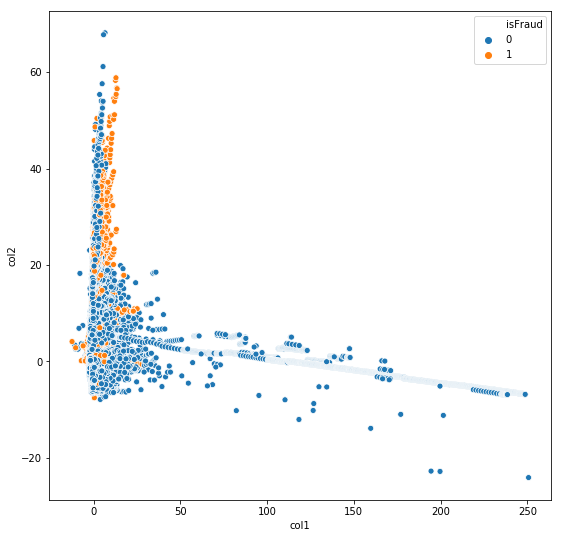

In [41]:
#now for the fun part lets visualize this
plt.figure(figsize=(9,9))
sns.scatterplot(train_pca['col1'],train_pca['col2'],hue=train['isFraud'])

- From the plot it is clear that some of the fraud transactions are well separated from the legit transaction means our engineering featured are useful.
- Some of the legit transaction have high col1 values(above 50) may be this is due to the outliers present in the data.
- Between col1 value 0 to 30 and col2 value -10 to 20 fraud and legit transaction are overlapped heavily.

In [33]:
#Now lets see how we are getting the representaion in test data in 2D space.

In [42]:
test_pca = test.drop(['TransactionAmt','TransactionDT'],axis=1)
#first standardize the data
sc = StandardScaler()
test_pca = sc.fit_transform(test_pca)

In [43]:
#Applyig PCA
pca = PCA(n_components=2)
test_pca = pca.fit_transform(test_pca)
#converting the numpy array to dataframe
test_pca = pd.DataFrame(test_pca,columns=['col1','col2'])

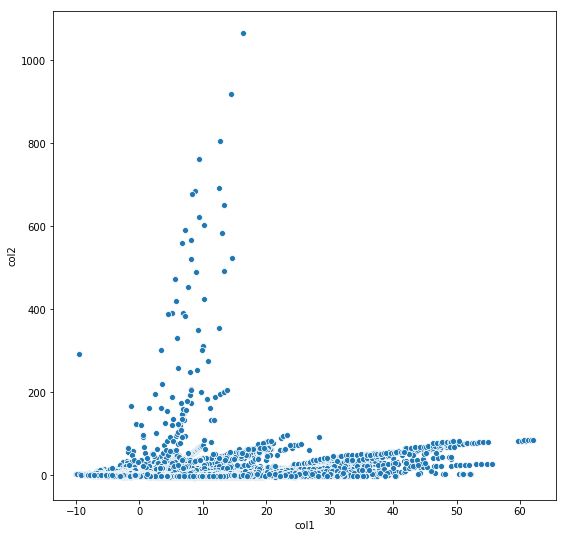

In [44]:
#now for the fun part lets visualize this
plt.figure(figsize=(9,9))
sns.scatterplot(test_pca['col1'],test_pca['col2'])

- Getting a differnet plot from train data.
- Here col2 values are going crazy high even above 1000.
- From PCA it is conclude that the scatter plot of train and test data are different.In train part col1 are high in test part col2 are high.
- Though in train data legit and fraud transaction are separated quite linearly.

## Modelling

In [4]:
#lets divide the train in to 2 parts in 70 and 30 ratio
#1st part will be train and 2nd part will be in cv

In [ ]:
train_mod = train[:413357]
cv_mod = train[413357:]

In [ ]:
x_train = train_mod.drop(['isFraud'],axis=1)
y_train = train_mod['isFraud']
x_cv = cv_mod.drop(['isFraud'],axis=1)
y_cv = cv_mod['isFraud']

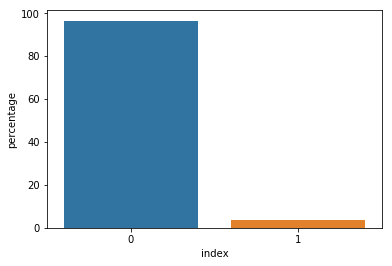

In [9]:
per_y_train = y_train.value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index",y="percentage",data=per_y_train)

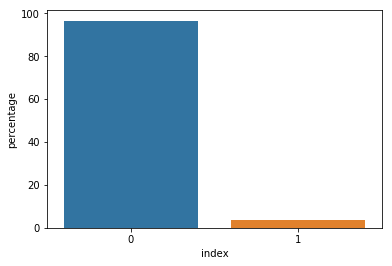

In [10]:
per_y_cv = y_cv.value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index",y="percentage",data=per_y_cv)

- y distribution from train and cv are same.No problem in applying model now.

#### Logistic regression

In [11]:
from sklearn.linear_model import SGDClassifier

In [117]:
#standardizing the x_train and x_cv for logistic regression
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_cv_sc = sc.transform(x_cv)

In [13]:
#lets try with first default value
clf = SGDClassifier(loss="log")
clf.fit(x_train_sc,y_train)
y_trainpred=clf.predict_proba(x_train_sc)
y_cvpred = clf.predict_proba(x_cv_sc)

In [14]:
print('train auc with default parameter:',roc_auc_score(y_train,y_trainpred[:,1]))
print('cv auc with default parameter:',roc_auc_score(y_cv,y_cvpred[:,1]))

train auc with default parameter: 0.803043394567984
cv auc with default parameter: 0.7779274673670928


- With the default parameter only we got a cv score auc 77.79% which is great.
- Lets hyperparameter tune it and see if we can improve the results.

In [24]:
#lets try with both L1 and L2 regularization

In [119]:
for i in [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]:
    for j in ['l1','l2']:
        print('For alpha:',i,'for reg:',j)
        clf = SGDClassifier(loss="log",class_weight='balanced',alpha=i,penalty=j)
        clf.fit(x_train_sc,y_train)
        y_trainpred=clf.predict_proba(x_train_sc)
        y_cvpred = clf.predict_proba(x_cv_sc)
        print('train auc:',roc_auc_score(y_train,y_trainpred[:,1]))
        print('cv auc:',roc_auc_score(y_cv,y_cvpred[:,1]))
        print('-'*30)

For alpha: 0.0001 for reg: l1
train auc: 0.7661137237091329
cv auc: 0.7147127715898759
------------------------------
For alpha: 0.0001 for reg: l2
train auc: 0.7915713336499863
cv auc: 0.7661817586491181
------------------------------
For alpha: 0.001 for reg: l1
train auc: 0.7632705889320499
cv auc: 0.7202056416974756
------------------------------
For alpha: 0.001 for reg: l2
train auc: 0.8351697005749272
cv auc: 0.798344190106917
------------------------------
For alpha: 0.01 for reg: l1
train auc: 0.7092803449322658
cv auc: 0.7041978072461993
------------------------------
For alpha: 0.01 for reg: l2
train auc: 0.8638904789489055
cv auc: 0.8329181667603571
------------------------------
For alpha: 0.1 for reg: l1
train auc: 0.6647085243697082
cv auc: 0.6786184708381596
------------------------------
For alpha: 0.1 for reg: l2
train auc: 0.8559314038752244
cv auc: 0.8335805955333271
------------------------------
For alpha: 1 for reg: l1
train auc: 0.5
cv auc: 0.5
-----------------

For alpha: 0.1 for reg: l2
train auc: 0.8559314038752244
cv auc: 0.8335805955333271
- We got best cv auc at alpha=0.1 and reg=l2 which is 83.35.
- With small amount of overfitting due to some redundant features are there we will try to remove it.

In [122]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix

In [121]:
clf = SGDClassifier(loss="log",class_weight='balanced',alpha=0.1,penalty='l2')
clf.fit(x_train_sc,y_train)
y_trainpred=clf.predict(x_train_sc)
y_cvpred = clf.predict(x_cv_sc)

In [123]:
cm_train = confusion_matrix(y_train,y_trainpred)
cm_cv  =confusion_matrix(y_cv,y_cvpred)

Text(0.5,1,'cv')

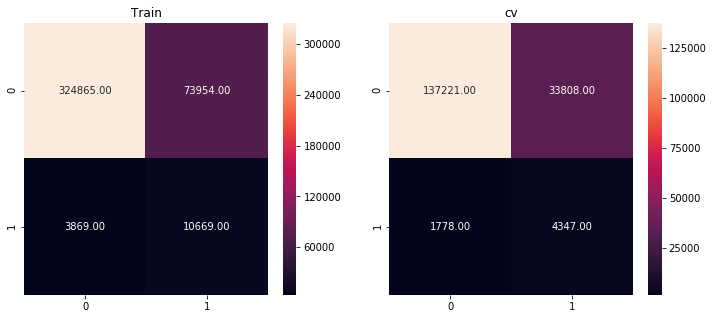

In [125]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train,annot=True,fmt='.2f')
plt.title('Train')
plt.subplot(1,2,2)
sns.heatmap(cm_cv,annot=True,fmt='.2f')
plt.title('cv')

#### Decision Tree

In [17]:
#first try with the default paramter
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_trainpred=clf.predict_proba(x_train)
y_cvpred = clf.predict_proba(x_cv)

In [18]:
print('train auc with default parameter:',roc_auc_score(y_train,y_trainpred[:,1]))
print('cv auc with default parameter:',roc_auc_score(y_cv,y_cvpred[:,1]))

train auc with default parameter: 1.0
cv auc with default parameter: 0.6831029543742493


- We got purely overfitted model beacause due to depth.
- Lets hyperparameter this model and see the difference.

In [19]:
for i in [3,5,7,9,11,13,15,21]:
    for j in [None,'sqrt','log2']:
        print('For depth:',i,'max features:',j)
        clf = DecisionTreeClassifier(max_depth=i,max_features=j,class_weight='balanced')
        clf.fit(x_train,y_train)
        y_trainpred=clf.predict_proba(x_train)
        y_cvpred = clf.predict_proba(x_cv)
        print('train auc:',roc_auc_score(y_train,y_trainpred[:,1]))
        print('cv auc:',roc_auc_score(y_cv,y_cvpred[:,1]))
        print('-'*30)

For depth: 3 max features: None
train auc: 0.7637127231957554
cv auc: 0.7584202492929651
------------------------------
For depth: 3 max features: sqrt
train auc: 0.784198737627847
cv auc: 0.7946319326916871
------------------------------
For depth: 3 max features: log2
train auc: 0.724500614581266
cv auc: 0.7276763866636293
------------------------------
For depth: 5 max features: None
train auc: 0.8188809332921803
cv auc: 0.8022763973313516
------------------------------
For depth: 5 max features: sqrt
train auc: 0.7985109697304389
cv auc: 0.7787918879015745
------------------------------
For depth: 5 max features: log2
train auc: 0.7725208105153053
cv auc: 0.7624895279127386
------------------------------
For depth: 7 max features: None
train auc: 0.8648904809112957
cv auc: 0.8341416351278772
------------------------------
For depth: 7 max features: sqrt
train auc: 0.825030593379298
cv auc: 0.8087241960755909
------------------------------
For depth: 7 max features: log2
train auc: 

For depth: 7 max features: None
train auc: 0.8655742868030681
cv auc: 0.8336492589095463
- We got best auc for cv data at depth=7 which is 83.36.
- Small amount of overfitting again.

In [127]:
clf = DecisionTreeClassifier(max_depth=7,class_weight='balanced')
clf.fit(x_train,y_train)
y_trainpred=clf.predict(x_train)
y_cvpred = clf.predict(x_cv)

In [128]:
cm_train = confusion_matrix(y_train,y_trainpred)
cm_cv  =confusion_matrix(y_cv,y_cvpred)

Text(0.5,1,'cv')

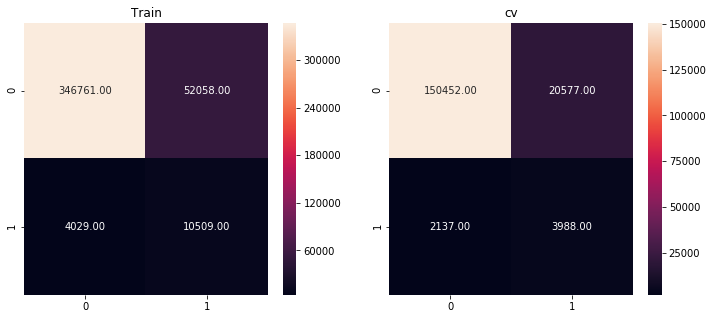

In [129]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train,annot=True,fmt='.2f')
plt.title('Train')
plt.subplot(1,2,2)
sns.heatmap(cm_cv,annot=True,fmt='.2f')
plt.title('cv')

#### RandomForest 

In [20]:
#first try with the default paramter
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_trainpred=clf.predict_proba(x_train)
y_cvpred = clf.predict_proba(x_cv)

In [21]:
print('train auc with default parameter:',roc_auc_score(y_train,y_trainpred[:,1]))
print('cv auc with default parameter:',roc_auc_score(y_cv,y_cvpred[:,1]))

train auc with default parameter: 0.999926970461592
cv auc with default parameter: 0.8076024285653429


- Purely overfitted model.
- Lets hyperparamter tune this.

In [22]:
train_auc=[]
cv_auc=[]
for i in [500,700,900,1000]:
    for j in [3,5,7,9,11,13]:
        print('For esti:',i,'depth:',j)
        clf = RandomForestClassifier(n_estimators=i,max_depth=j,class_weight='balanced',n_jobs=-1)
        clf.fit(x_train,y_train)
        y_trainpred=clf.predict_proba(x_train)
        y_cvpred = clf.predict_proba(x_cv)
        print('train auc:',roc_auc_score(y_train,y_trainpred[:,1]))
        print('cv auc:',roc_auc_score(y_cv,y_cvpred[:,1]))
        train_auc.append(roc_auc_score(y_train,y_trainpred[:,1]))
        cv_auc.append(roc_auc_score(y_cv,y_cvpred[:,1]))
        print('-'*30)

For esti: 500 depth: 3
train auc: 0.8332166081823085
cv auc: 0.8298554070254942
------------------------------
For esti: 500 depth: 5
train auc: 0.8569089032831259
cv auc: 0.846821896417853
------------------------------
For esti: 500 depth: 7
train auc: 0.8766923771862756
cv auc: 0.8590941328603896
------------------------------
For esti: 500 depth: 9
train auc: 0.8986369561812914
cv auc: 0.8682093718203416
------------------------------
For esti: 500 depth: 11
train auc: 0.9211544004673937
cv auc: 0.872276672496525
------------------------------
For esti: 500 depth: 13
train auc: 0.9439421880135079
cv auc: 0.8736710754746092
------------------------------
For esti: 700 depth: 3
train auc: 0.8310740365386088
cv auc: 0.8277495490978316
------------------------------
For esti: 700 depth: 5
train auc: 0.8566504559589061
cv auc: 0.8463470410376759
------------------------------
For esti: 700 depth: 7
train auc: 0.8771962479297164
cv auc: 0.8595970106991044
------------------------------
F

- Best cv auc is got as 87.44
- We see that after 900 estimators cv auc does not increase but train auc is increasing means overfitting
- Even though if we increase the depth we will get slighlty increase may be in 3 decimal places we will not increase the depth because train auc is increasing very fastly.
- Hence we take best hyperparamter as n_estimators as 900 and max_depth as 13

In [23]:
hyperparameter_train = np.array(train_auc).reshape(6,4)
hyperparameter_cv = np.array(cv_auc).reshape(6,4)

Text(0.5,1,'cv')

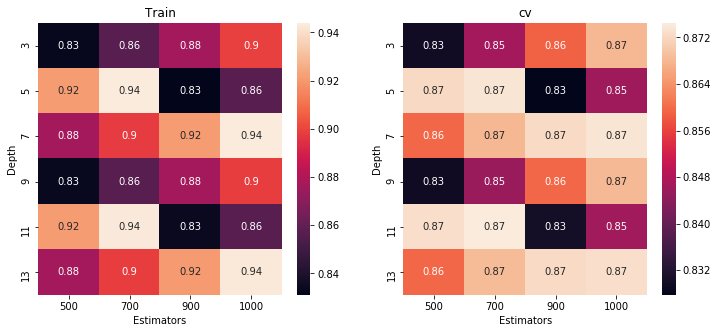

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(hyperparameter_train,annot=True,xticklabels=[500,700,900,1000],yticklabels=[3,5,7,9,11,13])
plt.xlabel('Estimators')
plt.ylabel('Depth')
plt.title('Train')
plt.subplot(1,2,2)
sns.heatmap(hyperparameter_cv,annot=True,xticklabels=[500,700,900,1000],yticklabels=[3,5,7,9,11,13])
plt.xlabel('Estimators')
plt.ylabel('Depth')
plt.title('cv')

In [25]:
#Now traning with the best parameters of RF and seeing the feature importance of all the features.
clf = RandomForestClassifier(n_estimators=900,max_depth=13,class_weight='balanced',n_jobs=-1)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=13, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

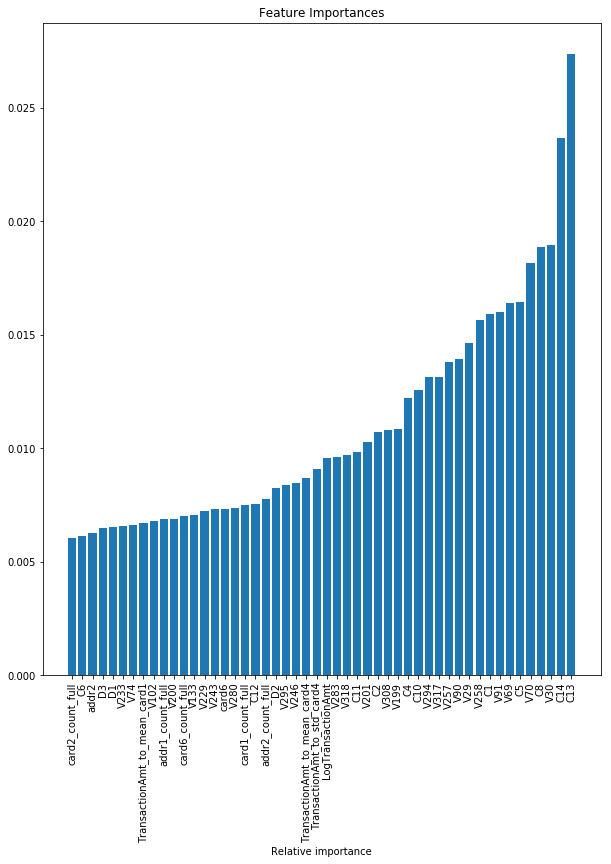

In [26]:
features = x_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.xticks(rotation=90)

(array([85., 72., 64., 32., 26., 11., 10.,  9.,  9., 10.,  5.,  6.,  4.,
         7.,  8.,  2.,  3.,  1.,  4.,  4.,  1.,  5.,  3.,  2.,  4.,  4.,
         4.,  2.,  1.,  0.,  3.,  1.,  0.,  1.,  1.,  3.,  0.,  1.,  0.,
         3.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,  2.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.00027371, 0.00054742, 0.00082113, 0.00109484,
        0.00136855, 0.00164226, 0.00191597, 0.00218968, 0.00246339,
        0.0027371 , 0.00301081, 0.00328452, 0.00355823, 0.00383194,
        0.00410565, 0.00437936, 0.00465307, 0.00492678, 0.00520049,
        0.0054742 , 0.00574791, 0.00602162, 0.00629533, 0.00656904,
        0.00684275, 0.00711646, 0.00739017, 0.00766388, 0.00793759,
        0.0082113 , 0.0084

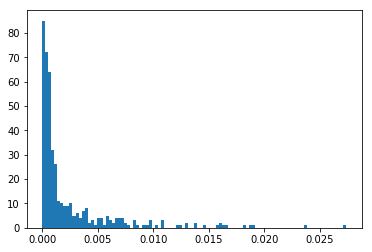

In [32]:
plt.hist(clf.feature_importances_,bins=100)

In [ ]:
#less than 0.0002 features are not include

In [35]:
features_to_include=[]
j=0
for i in importances:
    if i>=0.0002:
        features_to_include.append(features[j])
    j+=1

In [39]:
x_train_fe = x_train[features_to_include]
x_cv_fe = x_cv[features_to_include]

In [41]:
#Now traning with the best parameters of RF and seeing the feature importance of all the features.
clf = RandomForestClassifier(n_estimators=900,max_depth=13,class_weight='balanced',n_jobs=-1)
clf.fit(x_train_fe,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=13, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [42]:
clf = RandomForestClassifier(n_estimators=900,max_depth=13,class_weight='balanced',n_jobs=-1)
clf.fit(x_train_fe,y_train)
y_trainpred=clf.predict_proba(x_train_fe)
y_cvpred = clf.predict_proba(x_cv_fe)
print('train auc:',roc_auc_score(y_train,y_trainpred[:,1]))
print('cv auc:',roc_auc_score(y_cv,y_cvpred[:,1]))

train auc: 0.9444143681688888
cv auc: 0.8741003651248547


#### LGBM

<h4> did the hyperparameter tunning for LGBM and find the values for all parameter lets apply it</h4>

In [82]:
lgb_params = {
                    'objective':'binary',
                    'boosting_type':'gbdt',
                    'metric':'auc',
                    'n_jobs':-1,
                    'learning_rate':0.01,
                    'num_leaves': 2**8,
                    'max_depth':-1,
                    'tree_learner':'serial',
                    'colsample_bytree': 0.7,
                    'subsample_freq':1,
                    'subsample':0.7,
                    'n_estimators':800,
                    'max_bin':255,
                    'verbose':-1,
                    'early_stopping_rounds':100, 
                } 

In [84]:
import lightgbm as lgb

In [86]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train_fe,label=y_train)
cv_data = lgb.Dataset(x_cv_fe,label=y_cv)
estimator = lgb.train(lgb_params,train_set=train_data,valid_sets=[train_data,cv_data],verbose_eval=200)

In [87]:
estimator = lgb.train(lgb_params,train_set=train_data,valid_sets=[train_data,cv_data],verbose_eval=200)

Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.959917	valid_1's auc: 0.901769
[400]	training's auc: 0.987027	valid_1's auc: 0.918351
[600]	training's auc: 0.995369	valid_1's auc: 0.923932
[800]	training's auc: 0.998175	valid_1's auc: 0.925274
Did not meet early stopping. Best iteration is:
[800]	training's auc: 0.998175	valid_1's auc: 0.925274


## Conclusion

In [131]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","reg","n_estimators","Depth","TrainAuc","CvAuc"]
x.add_row(['logisticRegression','l2','_','_','86.35','83.35'])
x.add_row(['DT','_','_',7,'86.55','83.36'])
x.add_row(['RF','_','900',13,'94.33','87.44'])
x.add_row(['LGBM','_','800','-1','99.81','92.52'])

In [132]:
print(x)

+--------------------+-----+--------------+-------+----------+-------+
|       Model        | reg | n_estimators | Depth | TrainAuc | CvAuc |
+--------------------+-----+--------------+-------+----------+-------+
| logisticRegression |  l2 |      _       |   _   |  86.35   | 83.35 |
|         DT         |  _  |      _       |   7   |  86.55   | 83.36 |
|         RF         |  _  |     900      |   13  |  94.33   | 87.44 |
|        LGBM        |  _  |     800      |   -1  |  99.81   | 92.52 |
+--------------------+-----+--------------+-------+----------+-------+


- Done the hyperparamter tunnning in all the models.
- LGBM gives us the best result giving cv auc 92.52 with this LGBM model i submitted to the kaggle and got an AUC of 94.2 in leader board.

### References

- https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400
- https://www.kaggle.com/c/ieee-fraud-detection/discussion/99987
- https://www.kaggle.com/c/ieee-fraud-detection/discussion/107697#latest-620107
- https://www.kaggle.com/jesucristo/fraud-complete-eda
- https://www.kaggle.com/nroman/eda-for-cis-fraud-detection
- https://www.kaggle.com/yasagure/places-after-the-decimal-point-tell-us-a-lot
- https://www.kaggle.com/jolly2136/eda-fe-xgb
- https://www.kaggle.com/yasagure/fraud-makers-are-earnest-people-about-browser

### Taking the magic feature approach from 1st place solution

- The logic of our labeling is define reported chargeback on the card as fraud transaction (isFraud=1) and transactions posterior to it with either user account, email address or billing address directly linked to these attributes as fraud too. If none of above is reported and found beyond 120 days, then we define as legit transaction (isFraud=0).

In [3]:
# NORMALIZE D COLUMNS
for i in range(1,16):
    if i in [1,2,3,5,9]: 
        continue
    train['D'+str(i)] =  train['D'+str(i)] - train.TransactionDT/np.float32(24*60*60)
    test['D'+str(i)] =   test['D'+str(i)] -  test.TransactionDT/np.float32(24*60*60) 

### The Magic Feature - UID

- We will now create and use the MAGIC FEATURES. First we create a UID which will help our model find clients (credit cards). This UID isn't perfect. Many UID values contain 2 or more clients inside. However our model will detect this and by adding more splits with its trees, it will split these UIDs and find the single clients (credit cards).

In [4]:
def encode_CB(col1,col2,df1=train,df2=test):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str) 
    encode_LE(nm,verbose=False)

In [5]:
def encode_LE(col,train=train,test=test,verbose=True):
    df_comb = pd.concat([train[col],test[col]],axis=0)
    df_comb,_ = df_comb.factorize(sort=True)
    nm = col
    if df_comb.max()>32000: 
        train[nm] = df_comb[:len(train)].astype('int32')
        test[nm] = df_comb[len(train):].astype('int32')
    else:
        train[nm] = df_comb[:len(train)].astype('int16')
        test[nm] = df_comb[len(train):].astype('int16')
    del df_comb; x=gc.collect()

In [6]:
encode_CB('card1','addr1')

In [7]:
train['day'] = train.TransactionDT / (24*60*60)
train['uid'] = train.card1_addr1.astype(str)+'_'+np.floor(train.day-train.D1).astype(str)
test['day'] =test.TransactionDT / (24*60*60)
test['uid'] = test.card1_addr1.astype(str)+'_'+np.floor(test.day-test.D1).astype(str)

- For our model to use the new UID, we need to make lots of aggregated group features. We will add 47 new features! The pictures in the introduction to this notebook explain why this works. Note that after aggregation, we remove UID from our model. We don't use UID directly.

In [8]:
def encode_AG2(main_columns, uids, train_df=train, test_df=test):
    for main_column in main_columns:  
        for col in uids:
            comb = pd.concat([train_df[[col]+[main_column]],test_df[[col]+[main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

In [9]:
def encode_AG(main_columns, uids, aggregations=['mean'], train_df=train, test_df=test, 
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
        for col in uids:
            for agg_type in aggregations:
                new_col_name = main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')

In [10]:
def encode_FE(df1, df2, cols):
    for col in cols:
        df = pd.concat([df1[col],df2[col]])
        vc = df.value_counts(dropna=True, normalize=True).to_dict()
        vc[-1] = -1
        nm = col+'_FE'
        df1[nm] = df1[col].map(vc)
        df1[nm] = df1[nm].astype('float32')
        df2[nm] = df2[col].map(vc)
        df2[nm] = df2[nm].astype('float32')
        print(nm,', ',end='')

In [11]:
# FREQUENCY ENCODE UID
encode_FE(train,test,['uid'])
# AGGREGATE 
encode_AG(['TransactionAmt','D4','D9','D10','D15'],['uid'],['mean','std'],fillna=True,usena=True)
# AGGREGATE
encode_AG(['C'+str(x) for x in range(1,15) if x!=3],['uid'],['mean'],train,test,fillna=True,usena=True)
# AGGREGATE
encode_AG(['M'+str(x) for x in range(1,10)],['uid'],['mean'],fillna=True,usena=True)
# AGGREGATE
encode_AG2(['dist1'], ['uid'], train_df=train, test_df=test)
# AGGREGATE
encode_AG(['C14'],['uid'],['std'],train,test,fillna=True,usena=True)
# AGGREGATE 
encode_AG2(['C13','V314'], ['uid'], train_df=train, test_df=test)
# AGGREATE 
encode_AG2(['V127','V136','V309','V307','V320'], ['uid'], train_df=train, test_df=test)
# NEW FEATURE
train['outsider15'] = (np.abs(train.D1-train.D15)>3).astype('int8')
test['outsider15'] = (np.abs(test.D1-test.D15)>3).astype('int8')
print('outsider15')

uid_FE , 'TransactionAmt_uid_mean' , 'TransactionAmt_uid_std' , 'D4_uid_mean' , 'D4_uid_std' , 'D9_uid_mean' , 'D9_uid_std' , 'D10_uid_mean' , 'D10_uid_std' , 'D15_uid_mean' , 'D15_uid_std' , 'C1_uid_mean' , 'C2_uid_mean' , 'C4_uid_mean' , 'C5_uid_mean' , 'C6_uid_mean' , 'C7_uid_mean' , 'C8_uid_mean' , 'C9_uid_mean' , 'C10_uid_mean' , 'C11_uid_mean' , 'C12_uid_mean' , 'C13_uid_mean' , 'C14_uid_mean' , 'M1_uid_mean' , 'M2_uid_mean' , 'M3_uid_mean' , 'M4_uid_mean' , 'M5_uid_mean' , 'M6_uid_mean' , 'M7_uid_mean' , 'M8_uid_mean' , 'M9_uid_mean' , uid_dist1_ct, 'C14_uid_std' , uid_C13_ct, uid_V314_ct, uid_V127_ct, uid_V136_ct, uid_V309_ct, uid_V307_ct, uid_V320_ct, outsider15


In [39]:
#lets drop all the V features

In [12]:
v_fea = []
for i in train.columns:
    if i.startswith('V'):
        v_fea.append(i)

In [13]:
v_fea

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 

In [14]:
train.drop(v_fea,axis=1,inplace=True)
test.drop(v_fea,axis=1,inplace=True)

In [15]:
train.drop(['TransactionDT'],axis=1,inplace=True)
test.drop(['TransactionDT'],axis=1,inplace=True)

In [16]:
train.head()

,Unnamed: 0,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,uid_dist1_ct,C14_uid_std,uid_C13_ct,uid_V314_ct,uid_V127_ct,uid_V136_ct,uid_V309_ct,uid_V307_ct,uid_V320_ct,outsider15
0,0,0,68.5,4,13926,362.55467,150.0,1,142.0,0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1,0,29.0,4,2755,404.00000,150.0,2,102.0,0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2,0,59.0,4,4663,490.00000,150.0,3,166.0,1,...,1.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1
3,3,0,50.0,4,18132,567.00000,150.0,2,117.0,1,...,1.0,0.0,23.0,1.0,82.0,10.0,9.0,81.0,10.0,0
4,4,0,50.0,1,4497,514.00000,150.0,2,102.0,0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [21]:
train.drop(['uid'],axis=1,inplace=True)
test.drop(['uid'],axis=1,inplace=True)

In [22]:
train_mod = train[:413357]
cv_mod = train[413357:]
x_train = train_mod.drop(['isFraud','Unnamed: 0'],axis=1)
y_train = train_mod['isFraud']
x_cv = cv_mod.drop(['isFraud','Unnamed: 0'],axis=1)
y_cv = cv_mod['isFraud']

In [19]:
train_auc=[]
cv_auc=[]
for i in [500,700,900,1000]:
    for j in [3,5,7,9,11,13]:
        print('For esti:',i,'depth:',j)
        clf = RandomForestClassifier(n_estimators=i,max_depth=j,class_weight='balanced',n_jobs=-1)
        clf.fit(x_train,y_train)
        y_trainpred=clf.predict_proba(x_train)
        y_cvpred = clf.predict_proba(x_cv)
        print('train auc:',roc_auc_score(y_train,y_trainpred[:,1]))
        print('cv auc:',roc_auc_score(y_cv,y_cvpred[:,1]))
        train_auc.append(roc_auc_score(y_train,y_trainpred[:,1]))
        cv_auc.append(roc_auc_score(y_cv,y_cvpred[:,1]))
        print('-'*30)

For esti: 500 depth: 3
train auc: 0.840371455182011
cv auc: 0.8255653394978605
------------------------------
For esti: 500 depth: 5
train auc: 0.8789445644980245
cv auc: 0.8550543372463031
------------------------------
For esti: 500 depth: 7
train auc: 0.9069475070633733
cv auc: 0.8749385807705842
------------------------------
For esti: 500 depth: 9
train auc: 0.9349385901708334
cv auc: 0.8919690569244672
------------------------------
For esti: 500 depth: 11
train auc: 0.96211344328426
cv auc: 0.9071702030244065
------------------------------
For esti: 500 depth: 13
train auc: 0.983023172622354
cv auc: 0.9150560283307962
------------------------------
For esti: 700 depth: 3
train auc: 0.8400948116793164
cv auc: 0.8253034595755989
------------------------------
For esti: 700 depth: 5
train auc: 0.8790162096008329
cv auc: 0.8549345986317395
------------------------------
For esti: 700 depth: 7
train auc: 0.9068803401190453
cv auc: 0.8748701593869808
------------------------------
For

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

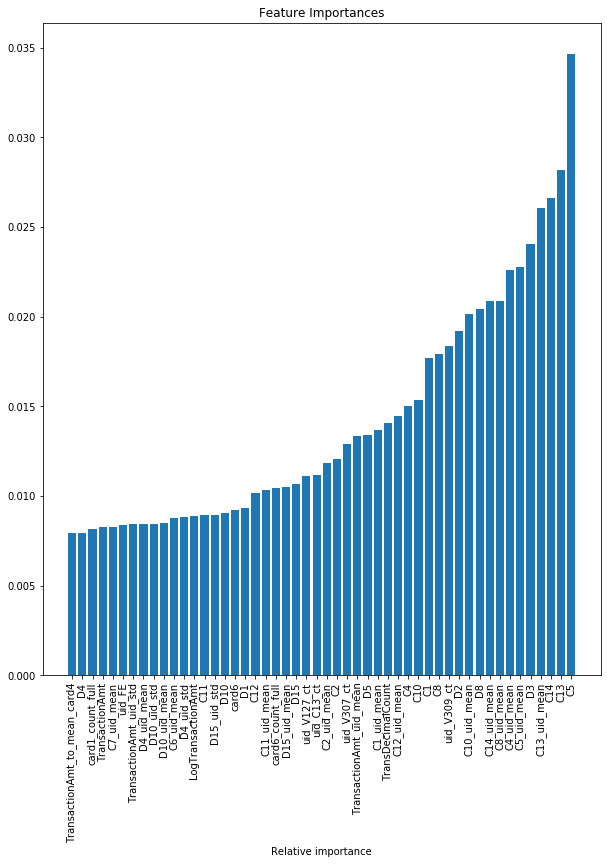

In [22]:
features = x_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.xticks(rotation=90)

In [20]:
lgb_params = {
                    'objective':'binary',
                    'boosting_type':'gbdt',
                    'metric':'auc',
                    'n_jobs':-1,
                    'learning_rate':0.01,
                    'num_leaves': 2**8,
                    'max_depth':-1,
                    'tree_learner':'serial',
                    'colsample_bytree': 0.7,
                    'subsample_freq':1,
                    'subsample':0.7,
                    'n_estimators':800,
                    'max_bin':255,
                    'verbose':-1,
                    'early_stopping_rounds':100, 
                } 

In [21]:
import lightgbm as lgb

Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.976256	valid_1's auc: 0.923851
[400]	training's auc: 0.994293	valid_1's auc: 0.935921
[600]	training's auc: 0.998772	valid_1's auc: 0.939266
Early stopping, best iteration is:
[649]	training's auc: 0.999137	valid_1's auc: 0.939546


In [23]:
clf = LGBMClassifier(objective='binary',
                    boosting_type='gbdt',
                    metric='auc',
                    n_jobs=-1,
                    learning_rate=0.01,
                    num_leaves= 2**8,
                    max_depth=-1,
                    tree_learner='serial',
                    colsample_bytree= 0.7,
                    subsample_freq=1,
                    subsample=0.7,
                    n_estimators=800,
                    max_bin=255,
                    verbose=-1)

In [24]:
clf.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
               importance_type='split', learning_rate=0.01, max_bin=255,
               max_depth=-1, metric='auc', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=800,
               n_jobs=-1, num_leaves=256, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.7,
               subsample_for_bin=200000, subsample_freq=1,
               tree_learner='serial', verbose=-1)

In [25]:
test.drop(['Unnamed: 0'],axis=1,inplace=True)

- Using magic feature we got auc in RandomForest from 87% to 91%.
- And LGBM in with hyperparameter tunning we got auc in 94%.
- Using feature importance of Random Forest the newly added feature have much more high importance.

In [22]:
x_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,uid_dist1_ct,C14_uid_std,uid_C13_ct,uid_V314_ct,uid_V127_ct,uid_V136_ct,uid_V309_ct,uid_V307_ct,uid_V320_ct,outsider15
0,86400,68.5,4,13926,362.55467,150.0,1,142.0,0,315.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,86401,29.0,4,2755,404.00000,150.0,2,102.0,0,325.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,86469,59.0,4,4663,490.00000,150.0,3,166.0,1,330.0,...,1.0,0.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1
3,86499,50.0,4,18132,567.00000,150.0,2,117.0,1,476.0,...,1.0,0.0,23.0,1.0,82.0,10.0,9.0,81.0,10.0,0
4,86506,50.0,1,4497,514.00000,150.0,2,102.0,0,420.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [26]:
predict_ytest = clf.predict_proba(test)

In [26]:
test.shape

(506691, 136)

In [27]:
x_train.shape

(413357, 135)

In [27]:
sol = pd.DataFrame(columns=['TransactionID','isFraud'])
transaction = pd.read_csv(r'test_transaction.csv/test_transaction.csv')
sol['TransactionID'] = transaction['TransactionID']
sol['isFraud']=predict_ytest[:,1]
sol.to_csv('finalPart.csv',index=False)